In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
# Mason's code begins here (Read data from cleaned up file & create a dataframe with just 2019 data)

In [3]:
#import df from cleaned data notebook
data_df=pd.read_csv('merged.tsv', sep='\t')

In [4]:
data_df

,Unnamed: 0,Country,Happiness Score_2015,Economy (GDP per Capita)_2015,Family_2015,Health (Life Expectancy)_2015,Freedom_2015,Trust (Government Corruption)_2015,Generosity_2015,Dystopia Residual_2015,...,Social support_2019,Healthy life expectancy_2019,Freedom to make life choices_2019,Generosity_2019,Perceptions of corruption_2019,Internet_2015,Internet_2016,Internet_2017,Internet_2018,Internet_2019
0,0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,...,1.526,1.052,0.572,0.263,0.343,87.47910,89.13470,89.68610,89.68610,93.14610
1,1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,...,1.624,1.026,0.591,0.354,0.118,98.20000,98.24000,98.26000,99.01100,99.01100
2,2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,...,1.573,0.996,0.592,0.252,0.410,96.33050,96.96780,97.09940,97.64430,98.04640
3,3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,...,1.582,1.028,0.603,0.271,0.341,96.81030,97.29820,96.35760,96.49170,98.00000
4,4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,...,1.505,1.039,0.584,0.285,0.308,90.00000,91.16000,91.00000,91.00000,91.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,123,Afghanistan,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,...,0.517,0.361,0.000,0.158,0.025,8.26000,11.20000,13.50000,13.50000,13.50000
124,124,Rwanda,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,...,0.711,0.614,0.555,0.217,0.411,18.00000,20.00000,21.76760,21.76760,21.76760
125,125,Benin,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,...,0.437,0.397,0.349,0.175,0.082,11.25500,11.99400,20.00000,20.00000,20.00000
126,126,Burundi,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,...,0.447,0.380,0.220,0.176,0.180,4.86622,5.17363,2.66075,2.66075,2.66075


In [5]:
df=data_df.drop("Unnamed: 0", axis=1)
df

,Country,Happiness Score_2015,Economy (GDP per Capita)_2015,Family_2015,Health (Life Expectancy)_2015,Freedom_2015,Trust (Government Corruption)_2015,Generosity_2015,Dystopia Residual_2015,Happiness Score_2016,...,Social support_2019,Healthy life expectancy_2019,Freedom to make life choices_2019,Generosity_2019,Perceptions of corruption_2019,Internet_2015,Internet_2016,Internet_2017,Internet_2018,Internet_2019
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.509,...,1.526,1.052,0.572,0.263,0.343,87.47910,89.13470,89.68610,89.68610,93.14610
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.501,...,1.624,1.026,0.591,0.354,0.118,98.20000,98.24000,98.26000,99.01100,99.01100
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.526,...,1.573,0.996,0.592,0.252,0.410,96.33050,96.96780,97.09940,97.64430,98.04640
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.498,...,1.582,1.028,0.603,0.271,0.341,96.81030,97.29820,96.35760,96.49170,98.00000
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.404,...,1.505,1.039,0.584,0.285,0.308,90.00000,91.16000,91.00000,91.00000,91.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Afghanistan,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,3.360,...,0.517,0.361,0.000,0.158,0.025,8.26000,11.20000,13.50000,13.50000,13.50000
124,Rwanda,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,3.515,...,0.711,0.614,0.555,0.217,0.411,18.00000,20.00000,21.76760,21.76760,21.76760
125,Benin,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,3.484,...,0.437,0.397,0.349,0.175,0.082,11.25500,11.99400,20.00000,20.00000,20.00000
126,Burundi,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2.905,...,0.447,0.380,0.220,0.176,0.180,4.86622,5.17363,2.66075,2.66075,2.66075


In [6]:
# Mason's code ends here

In [7]:
# Steve's code begins here (scatterplots & linear regression for happiness & six factors)
df = df.dropna()
len(df)

126

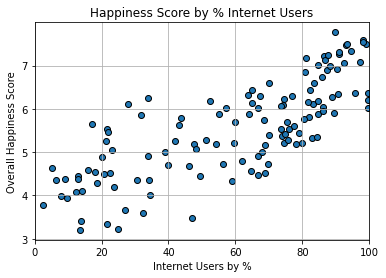

In [8]:
# Scatterplot of Overall Happiness Score vs. Internet Users by %
x_axis = df['Internet_2019']
y_axis = df['Score_2019']
plt.scatter(x_axis, y_axis, edgecolor = 'black')
plt.xlabel('Internet Users by %')
plt.ylabel('Overall Happiness Score')
plt.title('Happiness Score by % Internet Users')
plt.xlim(0,100)
plt.grid()

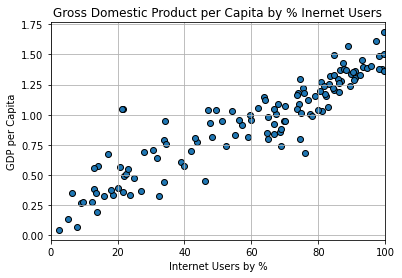

In [9]:
# Scatterplot of GDP per Capita vs. Internet Users by %
x_axis = df['Internet_2019']
y_axis = df['GDP per capita_2019']
plt.scatter(x_axis, y_axis, edgecolor = 'black')
plt.xlabel('Internet Users by %')
plt.ylabel('GDP per Capita')
plt.title('Gross Domestic Product per Capita by % Inernet Users')
plt.xlim(0,100)
plt.grid()

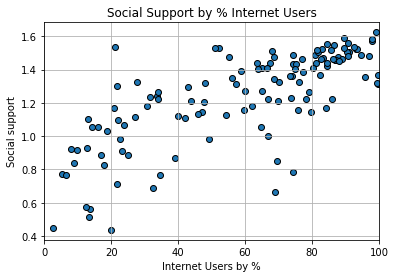

In [10]:
# Scatterplot of Social Support vs. Internet Users by %
x_axis = df['Internet_2019']
y_axis = df['Social support_2019']
plt.scatter(x_axis, y_axis, edgecolor = 'black')
plt.xlabel('Internet Users by %')
plt.ylabel('Social support')
plt.title('Social Support by % Internet Users')
plt.xlim(0,100)
plt.grid()

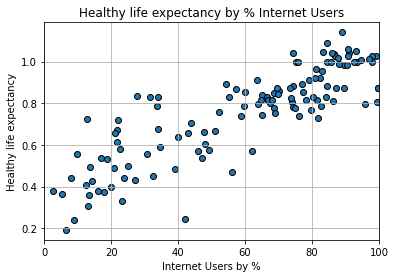

In [11]:
# Scatterplot of Healthy Life Expectancy vs. Internet Users by %
x_axis = df['Internet_2019']
y_axis = df['Healthy life expectancy_2019']
plt.scatter(x_axis, y_axis, edgecolor = 'black')
plt.xlabel('Internet Users by %')
plt.ylabel('Healthy life expectancy')
plt.title('Healthy life expectancy by % Internet Users')
plt.xlim(0,100)
plt.grid()

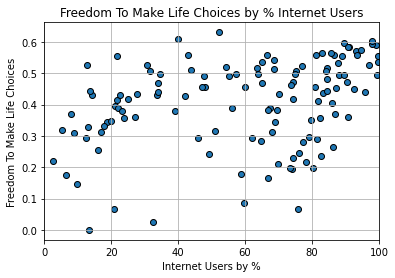

In [12]:
# Scatterplot of Freedom to Make Life Choices vs. Internet Users by %
x_axis = df['Internet_2019']
y_axis = df['Freedom to make life choices_2019']
plt.scatter(x_axis, y_axis, edgecolor = 'black')
plt.xlabel('Internet Users by %')
plt.ylabel('Freedom To Make Life Choices')
plt.title('Freedom To Make Life Choices by % Internet Users')
plt.xlim(0,100)
plt.grid()

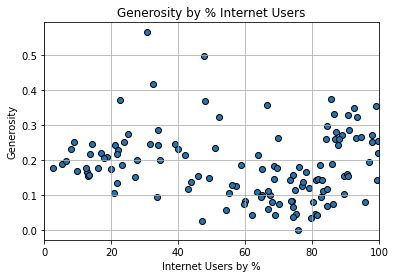

In [13]:
# Scatterplot of Generosity vs. Internet Users by %
x_axis = df['Internet_2019']
y_axis = df['Generosity_2019']
plt.scatter(x_axis, y_axis, edgecolor = 'black')
plt.xlabel('Internet Users by %')
plt.ylabel('Generosity')
plt.title('Generosity by % Internet Users')
plt.xlim(0,100)
plt.grid()

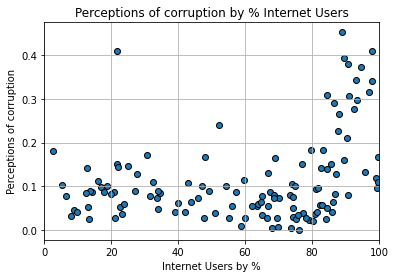

In [14]:
# Scatterplot of Perception of Corruption vs. Internet Users by %
x_axis = df['Internet_2019']
y_axis = df['Perceptions of corruption_2019']
plt.scatter(x_axis, y_axis, edgecolor = 'black')
plt.xlabel('Internet Users by %')
plt.ylabel('Perceptions of corruption')
plt.title('Perceptions of corruption by % Internet Users')
plt.xlim(0,100)
plt.grid()

The r-value is 0.7731710580827842 with a p-value of 2.7519014847796805e-26.


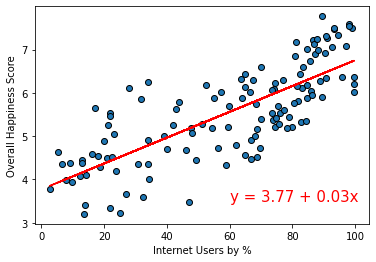

In [15]:
x_values = df['Internet_2019']
y_values = df['Score_2019']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(intercept,2)) + " + " + str(round(slope,2)) + "x"
print(f"The r-value is {rvalue} with a p-value of {pvalue}.")
plt.scatter(x_values,y_values,edgecolor = 'black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,3.5),fontsize=15,color="red")
plt.xlabel('Internet Users by %')
plt.ylabel('Overall Happiness Score')
plt.show()

The r-value is 0.9146345184639576 with a p-value of 1.3220937762723907e-50.


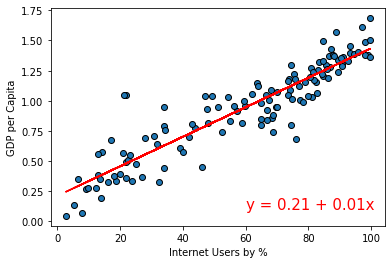

In [16]:
x_values = df['Internet_2019']
y_values = df['GDP per capita_2019']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(intercept,2)) + " + " + str(round(slope,2)) + "x"
print(f"The r-value is {rvalue} with a p-value of {pvalue}.")
plt.scatter(x_values,y_values,edgecolor = 'black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,0.1),fontsize=15,color="red")
plt.xlabel('Internet Users by %')
plt.ylabel('GDP per Capita')
plt.show()

The r-value is 0.7384691934897526 with a p-value of 5.753917718487739e-23.


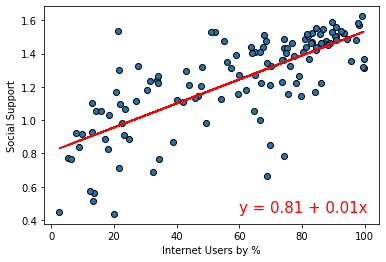

In [17]:
x_values = df['Internet_2019']
y_values = df['Social support_2019']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(intercept,2)) + " + " + str(round(slope,2)) + "x"
print(f"The r-value is {rvalue} with a p-value of {pvalue}.")
plt.scatter(x_values,y_values,edgecolor = 'black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,0.45),fontsize=15,color="red")
plt.xlabel('Internet Users by %')
plt.ylabel('Social Support')
plt.show()

The r-value is 0.8530680517299357 with a p-value of 7.808384368889725e-37.


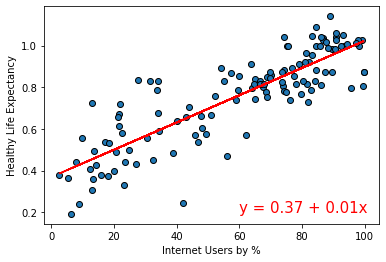

In [18]:
x_values = df['Internet_2019']
y_values = df['Healthy life expectancy_2019']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(intercept,2)) + " + " + str(round(slope,2)) + "x"
print(f"The r-value is {rvalue} with a p-value of {pvalue}.")
plt.scatter(x_values,y_values,edgecolor = 'black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,0.2),fontsize=15,color="red")
plt.xlabel('Internet Users by %')
plt.ylabel('Healthy Life Expectancy')
plt.show()

The r-value is 0.33961169780223854 with a p-value of 0.00010007105602070134.


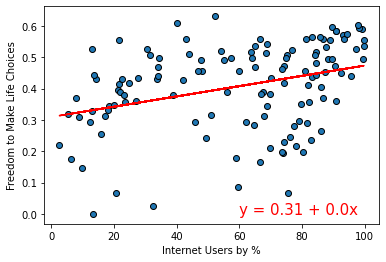

In [19]:
x_values = df['Internet_2019']
y_values = df['Freedom to make life choices_2019']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(intercept,2)) + " + " + str(round(slope,2)) + "x"
print(f"The r-value is {rvalue} with a p-value of {pvalue}.")
plt.scatter(x_values,y_values,edgecolor = 'black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,0),fontsize=15,color="red")
plt.xlabel('Internet Users by %')
plt.ylabel('Freedom to Make Life Choices')
plt.show()

The r-value is -0.11237939758027432 with a p-value of 0.2102579148355582.


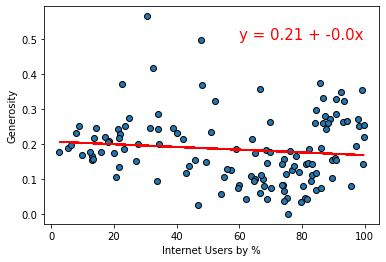

In [20]:
x_values = df['Internet_2019']
y_values = df['Generosity_2019']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(intercept,2)) + " + " + str(round(slope,2)) + "x"
print(f"The r-value is {rvalue} with a p-value of {pvalue}.")
plt.scatter(x_values,y_values,edgecolor = 'black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,0.5),fontsize=15,color="red")
plt.xlabel('Internet Users by %')
plt.ylabel('Generosity')
plt.show()

The r-value is 0.31213944860494686 with a p-value of 0.00037345267021469784.


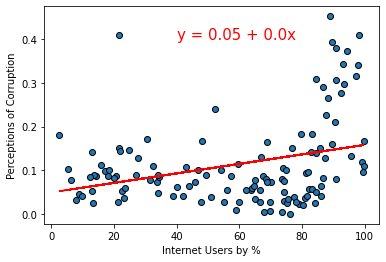

In [21]:
x_values = df['Internet_2019']
y_values = df['Perceptions of corruption_2019']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(intercept,2)) + " + " + str(round(slope,2)) + "x"
print(f"The r-value is {rvalue} with a p-value of {pvalue}.")
plt.scatter(x_values,y_values,edgecolor = 'black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,0.4),fontsize=15,color="red")
plt.xlabel('Internet Users by %')
plt.ylabel('Perceptions of Corruption')
plt.show()

In [22]:
df_2019 = df[['Country', 'Score_2019', 'Social support_2019', 'GDP per capita_2019', 'Healthy life expectancy_2019', 'Freedom to make life choices_2019', 'Generosity_2019', 'Perceptions of corruption_2019', 'Internet_2019']]
df_2019 = df_2019.rename(columns = {'Country': 'Country','Score_2019':'Score', 'Social support_2019':'Social', 'GDP per capita_2019':'GDP', 'Healthy life expectancy_2019':'Health', 'Freedom to make life choices_2019':'Freedom', 'Generosity_2019':'Generosity', 'Perceptions of corruption_2019':'Trust', 'Internet_2019':'Users'})
df_2019.head()

,Country,Score,Social,GDP,Health,Freedom,Generosity,Trust,Users
0,Switzerland,7.480,1.526,1.452,1.052,0.572,0.263,0.343,93.1461
1,Iceland,7.494,1.624,1.380,1.026,0.591,0.354,0.118,99.0110
2,Denmark,7.600,1.573,1.383,0.996,0.592,0.252,0.410,98.0464
3,Norway,7.554,1.582,1.488,1.028,0.603,0.271,0.341,98.0000
4,Canada,7.278,1.505,1.365,1.039,0.584,0.285,0.308,91.0000


array([[<AxesSubplot:xlabel='Score', ylabel='Score'>,
        <AxesSubplot:xlabel='Social', ylabel='Score'>,
        <AxesSubplot:xlabel='GDP', ylabel='Score'>,
        <AxesSubplot:xlabel='Health', ylabel='Score'>,
        <AxesSubplot:xlabel='Freedom', ylabel='Score'>,
        <AxesSubplot:xlabel='Generosity', ylabel='Score'>,
        <AxesSubplot:xlabel='Trust', ylabel='Score'>,
        <AxesSubplot:xlabel='Users', ylabel='Score'>],
       [<AxesSubplot:xlabel='Score', ylabel='Social'>,
        <AxesSubplot:xlabel='Social', ylabel='Social'>,
        <AxesSubplot:xlabel='GDP', ylabel='Social'>,
        <AxesSubplot:xlabel='Health', ylabel='Social'>,
        <AxesSubplot:xlabel='Freedom', ylabel='Social'>,
        <AxesSubplot:xlabel='Generosity', ylabel='Social'>,
        <AxesSubplot:xlabel='Trust', ylabel='Social'>,
        <AxesSubplot:xlabel='Users', ylabel='Social'>],
       [<AxesSubplot:xlabel='Score', ylabel='GDP'>,
        <AxesSubplot:xlabel='Social', ylabel='GDP'>,
       

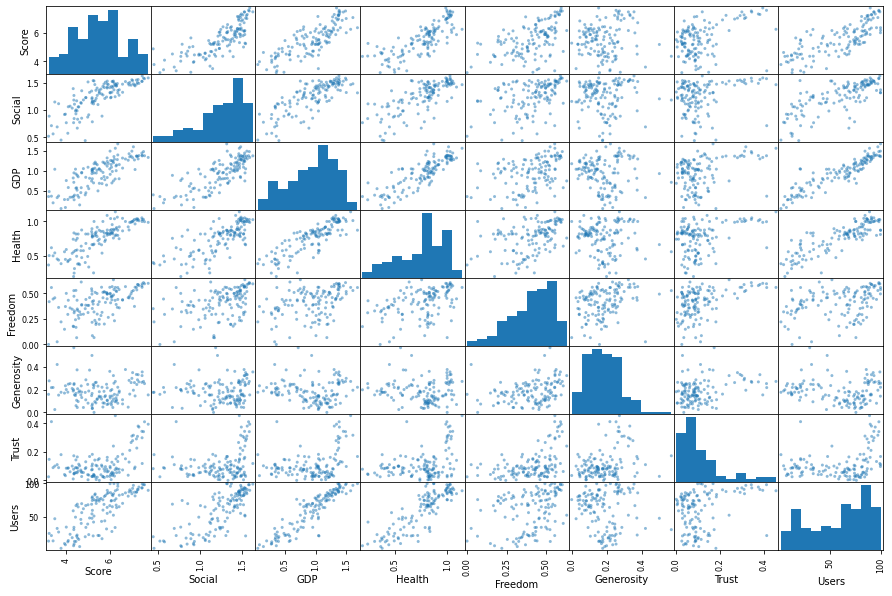

In [23]:
# scatterplot matrix
pd.plotting.scatter_matrix(df_2019, figsize = (15,10))

In [ ]:
# Steve's code ends here

In [ ]:
# Rebecca's code begins here (line graphs of happiness/internet usage over time)

In [24]:
df.head()

,Country,Happiness Score_2015,Economy (GDP per Capita)_2015,Family_2015,Health (Life Expectancy)_2015,Freedom_2015,Trust (Government Corruption)_2015,Generosity_2015,Dystopia Residual_2015,Happiness Score_2016,...,Social support_2019,Healthy life expectancy_2019,Freedom to make life choices_2019,Generosity_2019,Perceptions of corruption_2019,Internet_2015,Internet_2016,Internet_2017,Internet_2018,Internet_2019
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.509,...,1.526,1.052,0.572,0.263,0.343,87.4791,89.1347,89.6861,89.6861,93.1461
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.501,...,1.624,1.026,0.591,0.354,0.118,98.2000,98.2400,98.2600,99.0110,99.0110
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.526,...,1.573,0.996,0.592,0.252,0.410,96.3305,96.9678,97.0994,97.6443,98.0464
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.498,...,1.582,1.028,0.603,0.271,0.341,96.8103,97.2982,96.3576,96.4917,98.0000
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.404,...,1.505,1.039,0.584,0.285,0.308,90.0000,91.1600,91.0000,91.0000,91.0000


In [25]:
# Find averages for happiness scores for each year
happiness_2015 = df["Happiness Score_2015"].mean()
happiness_2016 = df["Happiness Score_2016"].mean()
happiness_2017 = df["Happiness.Score_2017"].mean()
happiness_2018 = df["Score_2018"].mean()
happiness_2019 = df["Score_2019"].mean()

In [26]:
# Create x and y axis
years = ["2015", "2016", "2017", "2018", "2019"]
average_happiness_scores = [happiness_2015, happiness_2016, happiness_2017, happiness_2018, happiness_2019]

Text(0, 0.5, 'Average Happiness Scores')

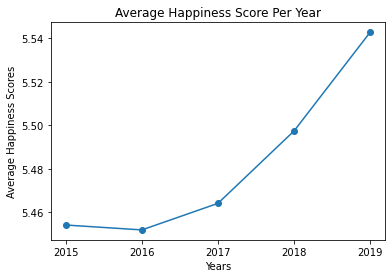

In [27]:
# Create line chart showing the average happiness score per year
average_happiness = plt.plot(years, average_happiness_scores, marker="o")

plt.title("Average Happiness Score Per Year")
plt.xlabel("Years")
plt.ylabel("Average Happiness Scores")

In [28]:
# Find average percentage of internet users for each year
internet_users_2015 = df["Internet_2015"].mean()
internet_users_2016 = df["Internet_2016"].mean()
internet_users_2017 = df["Internet_2017"].mean()
internet_users_2018 = df["Internet_2018"].mean()
internet_users_2019 = df["Internet_2019"].mean()

In [29]:
# Create x and y axis
years = ["2015", "2016", "2017", "2018", "2019"]
average_internet_users = [internet_users_2015, internet_users_2016, internet_users_2017, internet_users_2018, internet_users_2019]

Text(0, 0.5, 'Average Percentage of Internet Users')

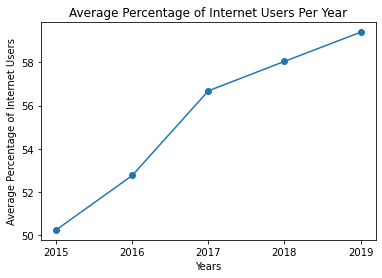

In [30]:
# Create line chart showing the average percentage of internet users per year
average_internet_users = plt.plot(years, average_internet_users, marker="o")

plt.title("Average Percentage of Internet Users Per Year")
plt.xlabel("Years")
plt.ylabel("Average Percentage of Internet Users")

In [ ]:
# Rebecca's code ends here

In [ ]:
# Daniel's code begins here (interesting bins!/further testing)

In [31]:
df.head()

,Country,Happiness Score_2015,Economy (GDP per Capita)_2015,Family_2015,Health (Life Expectancy)_2015,Freedom_2015,Trust (Government Corruption)_2015,Generosity_2015,Dystopia Residual_2015,Happiness Score_2016,...,Social support_2019,Healthy life expectancy_2019,Freedom to make life choices_2019,Generosity_2019,Perceptions of corruption_2019,Internet_2015,Internet_2016,Internet_2017,Internet_2018,Internet_2019
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.509,...,1.526,1.052,0.572,0.263,0.343,87.4791,89.1347,89.6861,89.6861,93.1461
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.501,...,1.624,1.026,0.591,0.354,0.118,98.2000,98.2400,98.2600,99.0110,99.0110
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.526,...,1.573,0.996,0.592,0.252,0.410,96.3305,96.9678,97.0994,97.6443,98.0464
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.498,...,1.582,1.028,0.603,0.271,0.341,96.8103,97.2982,96.3576,96.4917,98.0000
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.404,...,1.505,1.039,0.584,0.285,0.308,90.0000,91.1600,91.0000,91.0000,91.0000


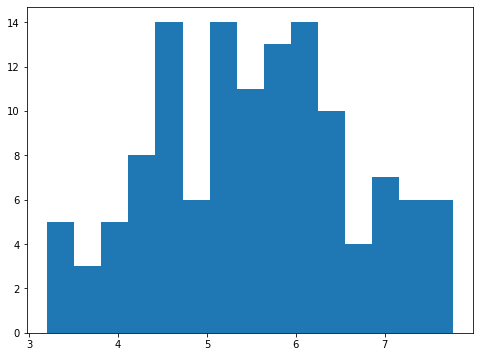

In [35]:
# Plotting histograms to find interesting things to dig into

# Happiness Score
plt.figure(figsize=(8,6))
plt.hist(df["Score_2019"],15)
plt.show()

# Looks normally distributed, not a good candidate for binning

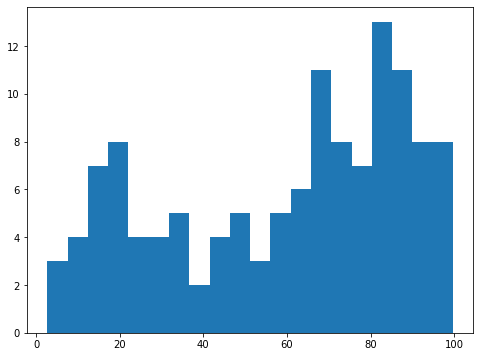

In [36]:
# Internet Users
plt.figure(figsize=(8,6))
plt.hist(df["Internet_2019"],20)
plt.show()

# Potentially bimodal– would be interesting to look at countries with below 40% and above 60% (at least based
# on the 2018 data)

In [38]:
# Just looking at countries with a percentage of users less than 50%
below_50 = df[df["Internet_2019"] < 50]
below_50["Country"].count()

45

In [39]:
# Just looking at countries with a percentage of users greater than or equal to 50%
above_50 = df[df["Internet_2019"] >= 50]
above_50["Country"].count()

81

The r-value is 0.3350803051943203.
The r-value is 0.6606838218672846.


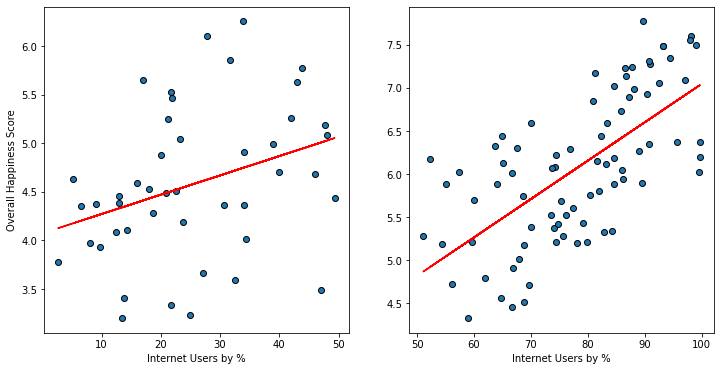

In [40]:
# Generate a scatterplot of countries below and above 50% in order to see if this makes for stronger/weaker correlations

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
x_values = below_50['Internet_2019']
y_values = below_50['Score_2019']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue}.")
plt.scatter(x_values,y_values,edgecolor = 'black')
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Internet Users by %')
plt.ylabel('Overall Happiness Score')


plt.subplot(1, 2, 2)
x_values = above_50['Internet_2019']
y_values = above_50['Score_2019']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue}.")
plt.scatter(x_values,y_values,edgecolor = 'black')
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Internet Users by %')


plt.show()

The r-value is 0.138068491629683.
The r-value is 0.3835607916886099.


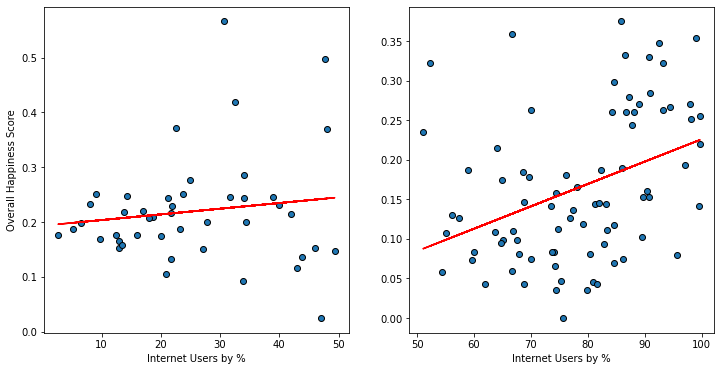

In [41]:
# Compare Generosity vs. Internet Users
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
x_values = below_50['Internet_2019']
y_values = below_50['Generosity_2019']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue}.")
plt.scatter(x_values,y_values,edgecolor = 'black')
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Internet Users by %')
plt.ylabel('Overall Happiness Score')


plt.subplot(1, 2, 2)
x_values = above_50['Internet_2019']
y_values = above_50['Generosity_2019']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is {rvalue}.")
plt.scatter(x_values,y_values,edgecolor = 'black')
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Internet Users by %')


plt.show()

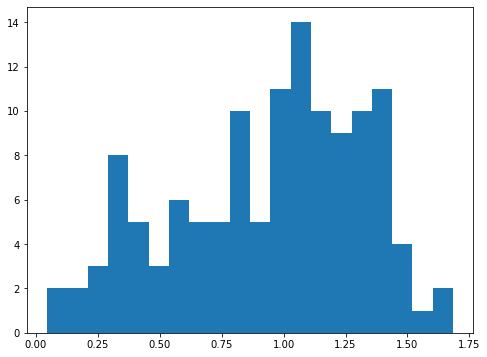

In [46]:
# GDP
plt.figure(figsize=(8,6))
plt.hist(df["GDP per capita_2019"],20)
plt.show()

# Looks pretty normally distributed, maybe not a good candidate for binning

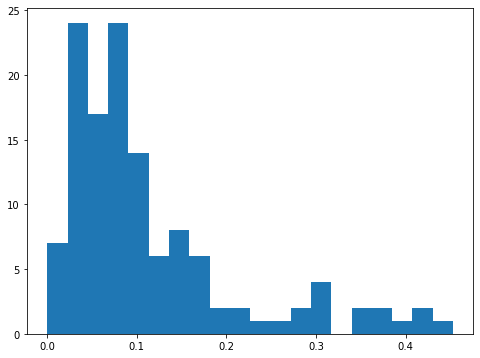

In [47]:
# Trust/Corruption
plt.figure(figsize=(8,6))
plt.hist(df["Perceptions of corruption_2019"],20)
plt.show()

# Definitely the majority of countries fall below 0.2, so we could look at those countries separate from the rest
# (again, based on 2018 data)

In [ ]:
# Daniel's code ends here